# Plotting absolute stability regions

In [1]:
using Plots, LinearAlgebra

$$\pi(\xi;z) = \rho(\xi) - z \sigma(\xi) = 0$$

For each value of $z$, this polynomial has some number of roots that, of course, change as $z$ varies.

In [2]:
## Here α and β must have the same length
# For example: A-M 3rd order
# α = [1,-1,0]
# β = [5/12,8/12,-1/12]
# Leapfrog
# α = [1,-1,0]
# β = [0,2,0]
###################

ρ = (α,z) -> (z.^(length(α)-1:-1:0))'*α
σ = (β,z) -> (z.^(length(β)-1:-1:0))'*β
R = (α,β,z) -> ρ(α,z)/σ(β,z)

#5 (generic function with 1 method)

Recall that the "possible boundary" of the stability region $S$ is given by

$$ \frac{\rho(e^{i \theta})}{\sigma(e^{i\theta})}, \quad \theta \in [0,2 \pi). $$

In [3]:
function find_roots(c) # supposing that the leading order coefficient is 1
    # c contains the rememing coefficients
    r = length(c)
    A = zeros(Complex{Float64},r,r)
    A[1,:] = -c
    A[2:end,1:end-1] = A[2:end,1:end-1] + I # add identity matrix to lower-left block
    return eigvals(A)
end

function check_condition(λ)
    if maximum(abs.(λ)) > 1
        return 0
    else
        for i = 1:length(λ)
            if abs(λ[i]) ≈ 1. && sum(map(t -> λ[i] ≈ t,λ)) > 1
                return 0
            end
        end
    end
    return 1
end

function compute_roots(α,β,z)
    r = length(α)-1
    c = α-z*β
    if α[1]-z*β[1] ≈ 0.
        λ = find_roots(c[3:end]/c[2])
    else
        λ = find_roots(c[2:end]/c[1]) # let's suppose that first and second coefficients don't vanish simultaneously
    end
    return λ
end

function root_condition(α,β,z)
    return compute_roots(α,β,z) |> check_condition
end

function check_convergence(α,β) #supposing that α[1] = 1
    r = length(α)-1
    if sum(α) ≈ 0. && sum(β) ≈ sum(α.*(r:-1:0))
        println("Method is consistent")
    else
        println("Method is inconsistent")
    end
    if root_condition(α,β,0.) == 1
        println("Method is zero-stable")
    else
        println("Method is unstable")
    end
end

function convergence_stability(α,β)
    check_convergence(α,β)
    θ = 0:0.01(1+rand()/10):2*π # random perturbation to avoid singularities
    z = map(t -> R(α,β,exp(1im*t)),θ);
    
    if abs(minimum(real(z)) - maximum(real(z))) < .1
        xrange = [-4.,4.]
    else 
        xrange = [minimum(real(z))-1,maximum(real(z))+1]
    end
    
    if abs(minimum(imag(z)) - maximum(imag(z))) < .1
        yrange = [-4.,4.]
    else 
        yrange = [minimum(imag(z))-1,maximum(imag(z))+1]
    end
    
    if xrange[1] < -10
        xrange[1] = -4
    end
    if yrange[1] < -10
        yrange[1] = -4
    end
    if xrange[2] > 10
        xrange[2] = 4
    end
    if yrange[2] > 10
        yrange[2] = 4
    end
    
    contourf(xrange[1]:0.01:xrange[2],yrange[1]:0.01(1+rand()/10):yrange[2],(x,y)-> root_condition(α,β,x+1im*y),colorbar=false)
    plot!(real(z),imag(z),xlim=xrange,ylim=yrange,aspectratio=1,legend=false,lw=4,linecolor=:orange)
end

convergence_stability (generic function with 1 method)

Find the roots of

\begin{align*}
\zeta^2 - \zeta = 0
\end{align*}

In [4]:
find_roots([-1,0])

2-element Vector{ComplexF64}:
 0.0 + 0.0im
 1.0 + 0.0im

Method is consistent
Method is zero-stable


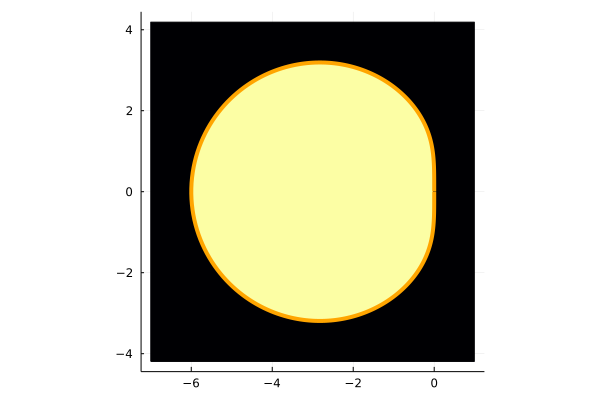

In [16]:
# A-M 3rd order
α = [1,-1,0]
β = [5/12,8/12,-1/12]
p = convergence_stability(α,β)

In [17]:
savefig(p,"AM-3rd.pdf")

In [6]:
compute_roots(α,β,-2)

2-element Vector{ComplexF64}:
 -0.40582741955797763 + 0.0im
   0.2240092377397959 + 0.0im

Method is consistent
Method is zero-stable


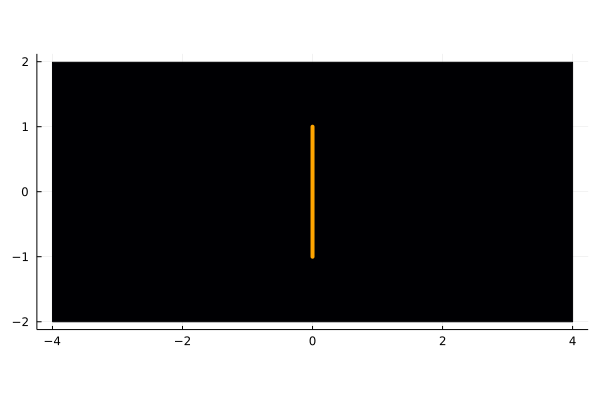

In [7]:
# Leapfrog
α = [1,0,-1]
β = [0,2,0]
convergence_stability(α,β)

Method is consistent
Method is zero-stable


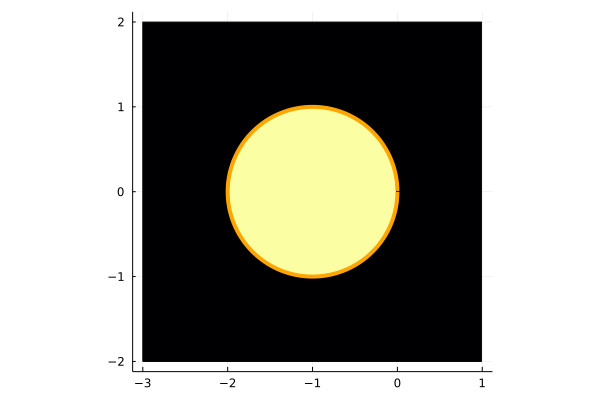

In [8]:
# Forward Euler
α = [1,-1]
β = [0,1]
convergence_stability(α,β)

Method is consistent
Method is zero-stable


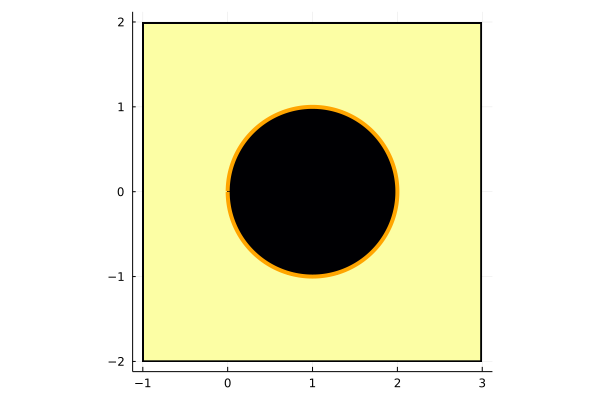

In [9]:
# Backward Euler
α = [1,-1]
β = [1,0]
convergence_stability(α,β)

Method is consistent
Method is zero-stable


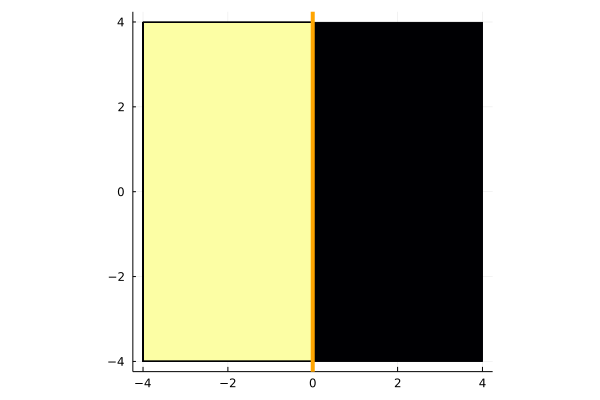

In [10]:
# Trapezoid
α = [1,-1]
β = [.5,.5]
convergence_stability(α,β)

Method is consistent
Method is zero-stable


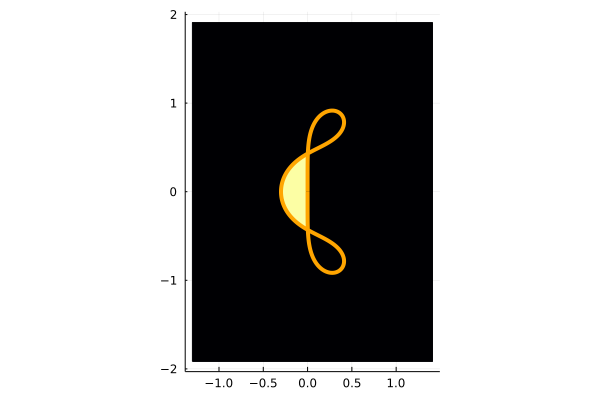

In [11]:
# A-B four step
α = [1,-1,0,0,0]
β = [0,55,-59,37,-9]/24
convergence_stability(α,β)

In [12]:
z = R(α,β,exp(1im*5))

0.40796674465342403 + 0.749343157823902im

In [13]:
abs.(compute_roots(α,β,z)) # roots of \pi(\xi;z)

4-element Vector{Float64}:
 0.5341283948341674
 1.000000000000001
 0.37069069662575793
 1.6159402431409078

In [14]:
z = R(α,β,exp(1im*4.252))

8.553795540246944e-5 + 0.43003577762135065im

In [15]:
compute_roots(α,β,z)

4-element Vector{ComplexF64}:
 -0.4442966202159724 + 0.8958797426355074im
 0.19049859439097486 - 0.4108913227581007im
  0.3459692948015803 + 0.08832682135670405im
  0.9080247555045485 + 0.4121834158148169im